## Step 1: Import the necessary packages and load the image and csv files

In [2]:
import os
import sys
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

In [3]:
path = os.getcwd()
image = cv2.imread(path+'/Image_Oligodendrocytes_virus_neurons.png')
print(image.shape)

(2048, 2048, 3)


## Step 2: Separate color channels

In [4]:
# OpenCV uses BGR order, so:
# - G (Green channel): Virus-positive cells
# - R (Red channel): Part of oligodendrocytes (Magenta is a combination of red and blue)
# - B (Blue channel): Neurons

virus_channel = image[:, :, 1]  # Green channel represents virus-positive cells
oligo_channel = image[:, :, 2]  # Red channel's magenta part represents oligodendrocytes
neuron_channel = image[:, :, 0]  # Blue channel represents neurons

## Step 3: Binarize each channel

In [5]:
print(f'THRESH_BINARY={cv2.THRESH_BINARY}, THRESH_OTSU={cv2.THRESH_OTSU}')

THRESH_BINARY=0, THRESH_OTSU=8


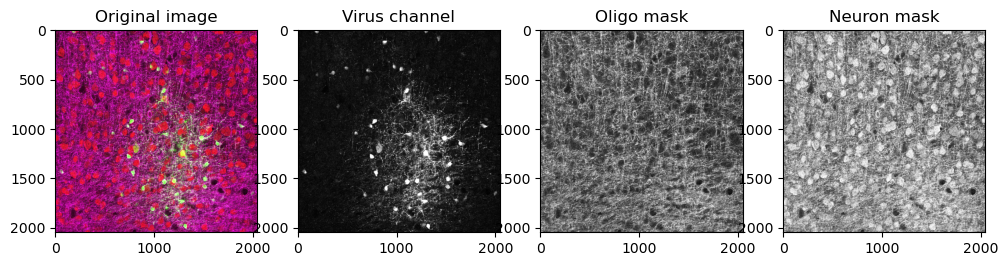

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(image)
axes[0].set_title("Original image")
axes[1].imshow(virus_channel, cmap='gray')
axes[1].set_title("Virus channel")
axes[2].imshow(oligo_channel, cmap='gray')
axes[2].set_title("Oligo mask")
axes[3].imshow(neuron_channel, cmap='gray')
axes[3].set_title("Neuron mask")
plt.show()

In [16]:
# Use Otsu's thresholding to automatically determine an appropriate binary threshold
virus_threshold_value, virus_mask = cv2.threshold(virus_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
virus_threshold_value_2 = virus_threshold_value+150  
_, virus_mask = cv2.threshold(virus_channel, virus_threshold_value_2, 255, cv2.THRESH_BINARY)

oli_threshold_value, oligo_mask = cv2.threshold(oligo_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
oli_threshold_value_2 = oli_threshold_value+100  
_, virus_mask = cv2.threshold(virus_channel, oli_threshold_value_2, 255, cv2.THRESH_BINARY)

neuron_threshold_value, neuron_mask = cv2.threshold(neuron_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
neuron_threshold_value_2 = neuron_threshold_value+100  
_, virus_mask = cv2.threshold(virus_channel, neuron_threshold_value_2, 255, cv2.THRESH_BINARY)

We need to find a good threshold.

<Figure size 640x480 with 0 Axes>

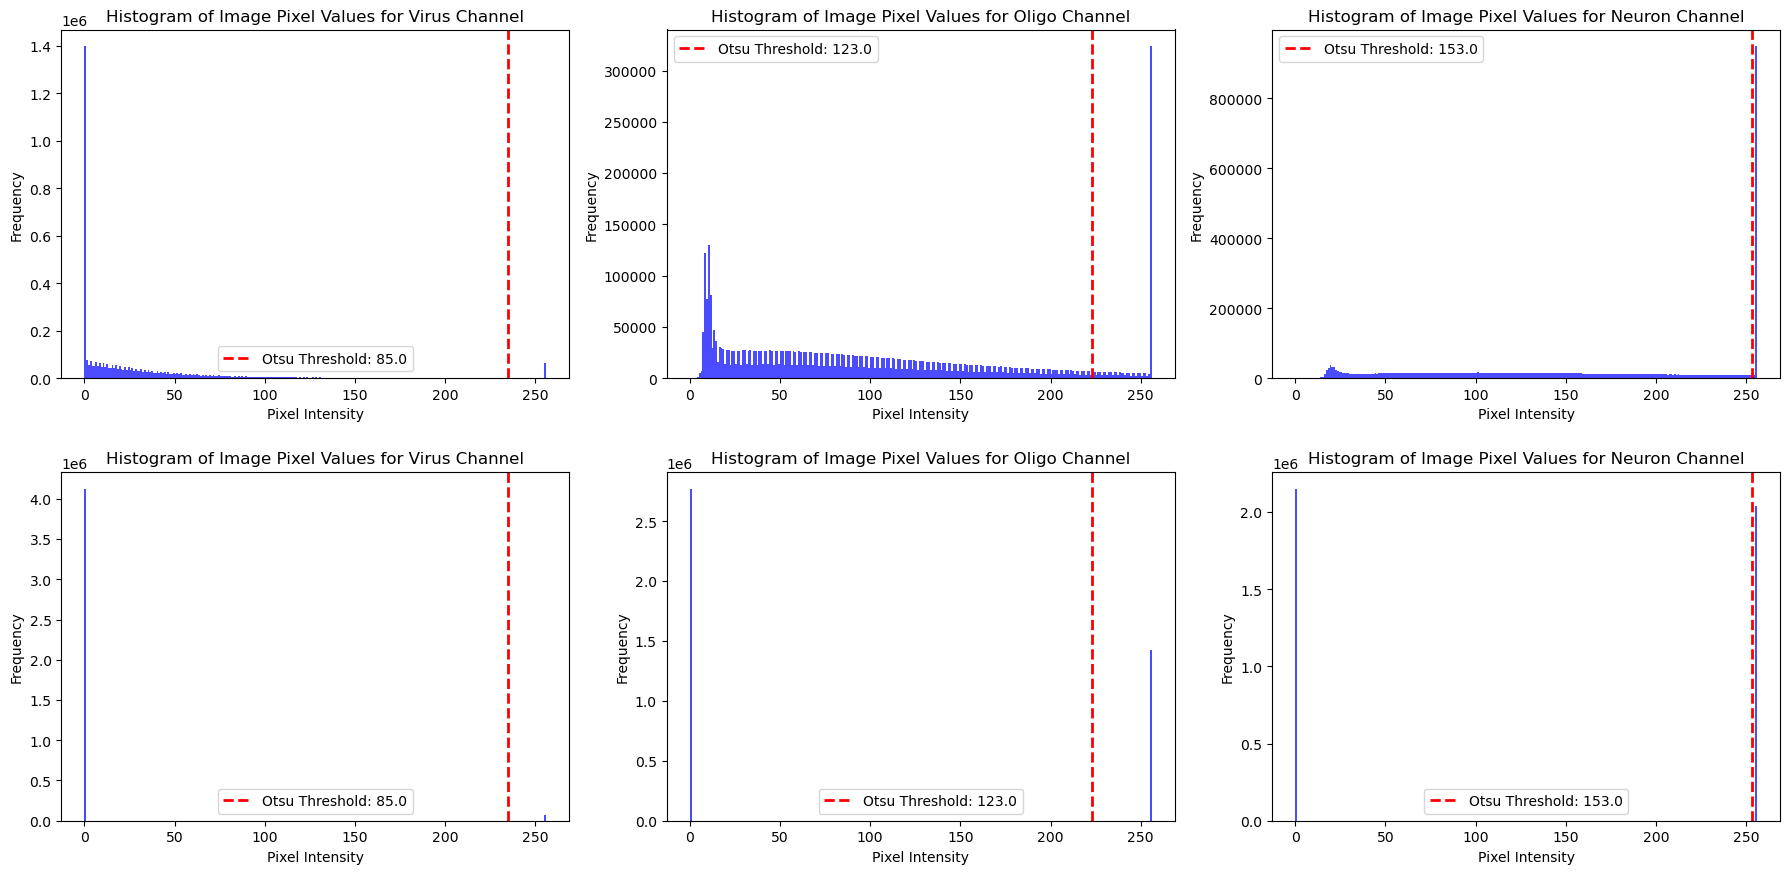

In [17]:
plt.clf()
fig, axes = plt.subplots(2, 3, figsize=(18, 9))

# Virus Channel Histogram
pixel_values = virus_channel.flatten()
axes[0, 0].hist(pixel_values, bins=256, range=[0, 256], color='blue', alpha=0.7)
axes[0, 0].axvline(virus_threshold_value_2, color='red', linestyle='dashed', linewidth=2, label=f'Otsu Threshold: {virus_threshold_value}')
axes[0, 0].set_title('Histogram of Image Pixel Values for Virus Channel')
axes[0, 0].set_xlabel('Pixel Intensity')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
# Oligo Channel Histogram
pixel_values = oligo_channel.flatten()
axes[0, 1].hist(pixel_values, bins=256, range=[0, 256], color='blue', alpha=0.7)
axes[0, 1].axvline(oli_threshold_value_2, color='red', linestyle='dashed', linewidth=2, label=f'Otsu Threshold: {oli_threshold_value}')
axes[0, 1].set_title('Histogram of Image Pixel Values for Oligo Channel')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
# Neuron Channel Histogram
pixel_values = neuron_channel.flatten()
axes[0, 2].hist(pixel_values, bins=256, range=[0, 256], color='blue', alpha=0.7)
axes[0, 2].axvline(neuron_threshold_value_2, color='red', linestyle='dashed', linewidth=2, label=f'Otsu Threshold: {neuron_threshold_value}')
axes[0, 2].set_title('Histogram of Image Pixel Values for Neuron Channel')
axes[0, 2].set_xlabel('Pixel Intensity')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()

# Virus Mask Histogram
pixel_values = virus_mask.flatten()
axes[1, 0].hist(pixel_values, bins=256, range=[0, 256], color='blue', alpha=0.7)
axes[1, 0].axvline(virus_threshold_value_2, color='red', linestyle='dashed', linewidth=2, label=f'Otsu Threshold: {virus_threshold_value}')
axes[1, 0].set_title('Histogram of Image Pixel Values for Virus Channel')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
# Oligo Mask Histogram
pixel_values = oligo_mask.flatten()
axes[1, 1].hist(pixel_values, bins=256, range=[0, 256], color='blue', alpha=0.7)
axes[1, 1].axvline(oli_threshold_value_2, color='red', linestyle='dashed', linewidth=2, label=f'Otsu Threshold: {oli_threshold_value}')
axes[1, 1].set_title('Histogram of Image Pixel Values for Oligo Channel')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
# Neuron Mask Histogram
pixel_values = neuron_mask.flatten()
axes[1, 2].hist(pixel_values, bins=256, range=[0, 256], color='blue', alpha=0.7)
axes[1, 2].axvline(neuron_threshold_value_2, color='red', linestyle='dashed', linewidth=2, label=f'Otsu Threshold: {neuron_threshold_value}')
axes[1, 2].set_title('Histogram of Image Pixel Values for Neuron Channel')
axes[1, 2].set_xlabel('Pixel Intensity')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

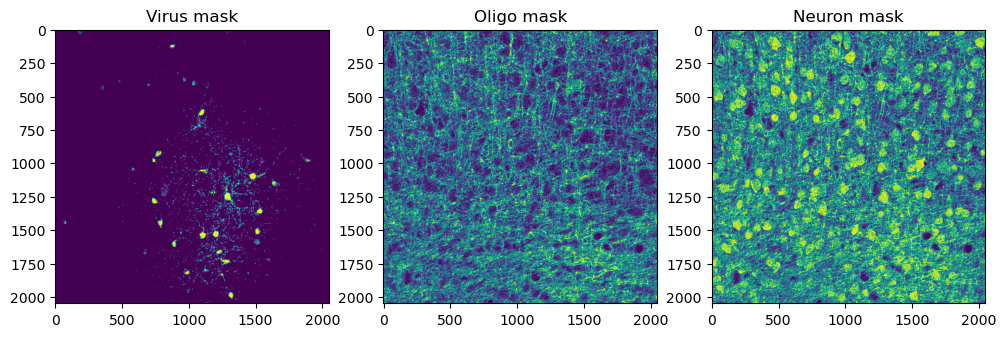

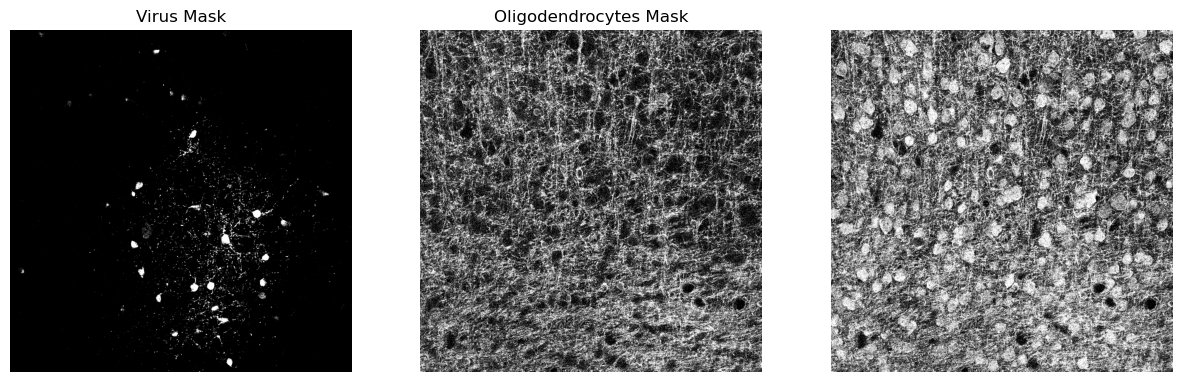

In [18]:
plt.clf()
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(virus_mask)
axes[0].set_title("Virus mask")
axes[1].imshow(oligo_mask)
axes[1].set_title("Oligo mask")
axes[2].imshow(neuron_mask)
axes[2].set_title("Neuron mask")
plt.show()

# Display the binary masks
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(virus_mask, cmap='gray')
ax[0].set_title("Virus Mask")
ax[1].imshow(oligo_mask, cmap='gray')
ax[1].set_title("Oligodendrocytes Mask")
ax[2].imshow(neuron_mask, cmap='gray')
for a in ax:
    a.axis('off')
plt.show()

## Step 4: Extract positions of virus-positive cells and build KD-Tree

In [19]:
oligo_positions = np.column_stack(np.where(oligo_mask > 0))  # Positions of oligodendrocytes in the mask
neuron_positions = np.column_stack(np.where(neuron_mask > 0))  # Positions of neurons in the mask

In [20]:
import networkx as nx
from scipy.spatial import cKDTree

def find_connected_components(points, threshold, min_size):
    tree = cKDTree(points)
    
    G = nx.Graph()
    
    for i in range(len(points)):
        indices = tree.query_ball_point(points[i], r=threshold)
        for j in indices:
            if i != j: 
                G.add_edge(i, j)
    
    components = list(nx.connected_components(G))
    centroids = [
        np.mean(points[list(comp)], axis=0) for comp in components if len(comp) >= min_size
    ]
    
    return centroids

In [21]:
from skimage import measure, color
from skimage.draw import rectangle_perimeter
virus_positions = np.column_stack(np.where(virus_mask > 0))  # Virus cell positions
print(f'virus_positions={virus_positions.shape}')
threshold = 1
virus_positions = find_connected_components(virus_positions, threshold, min_size=200)

print("连通块数量:", len(virus_positions))

virus_positions=(65948, 2)
连通块数量: 26


In [22]:
# Build KD-Tree for quick spatial matching of positions
oligo_tree = KDTree(oligo_positions)
neuron_tree = KDTree(neuron_positions)

In [23]:
# Initialize counters
virus_count = len(virus_positions)
oligo_coloc_count = 0
neuron_coloc_count = 0

# Check for colocalization by iterating through all virus-positive cell positions
for position in virus_positions:

    # Check if there is an oligodendrocyte within a small radius (e.g., 5 pixels)
    if oligo_tree.query_ball_point(position, r=1):
        oligo_coloc_count += 1

    # Check if there is a neuron within a small radius (e.g., 5 pixels)
    if neuron_tree.query_ball_point(position, r=1):
        neuron_coloc_count += 1

# Output results
print(f"Total number of virus-positive cells: {virus_count}")
print(f"Number of virus-positive cells colocalized with oligodendrocytes: {oligo_coloc_count}")
print(f"Number of virus-positive cells colocalized with neurons: {neuron_coloc_count}")

Total number of virus-positive cells: 26
Number of virus-positive cells colocalized with oligodendrocytes: 23
Number of virus-positive cells colocalized with neurons: 24


## Plot the original figure

### Results from our methods

(x, y) = (127, 876), virus_positive
(x, y) = (624, 1096), virus_positive
(x, y) = (931, 772), virus_positive
(x, y) = (981, 738), virus_positive
(x, y) = (982, 1891), virus_positive
(x, y) = (1057, 1106), virus_positive
(x, y) = (1100, 1480), virus_positive
(x, y) = (1089, 1542), virus_positive
(x, y) = (1152, 1637), virus_positive
(x, y) = (1159, 1362), virus_positive
(x, y) = (1197, 1278), virus_positive
(x, y) = (1251, 1290), virus_positive
(x, y) = (1284, 742), virus_positive
(x, y) = (1341, 1370), virus_positive
(x, y) = (1361, 1529), virus_positive
(x, y) = (1449, 787), virus_positive
(x, y) = (1536, 1104), virus_positive
(x, y) = (1512, 1512), virus_positive
(x, y) = (1531, 1202), virus_positive
(x, y) = (1604, 890), virus_positive
(x, y) = (1665, 1226), virus_positive
(x, y) = (1736, 1272), virus_positive
(x, y) = (1801, 1126), virus_positive
(x, y) = (1821, 988), virus_positive
(x, y) = (1838, 1249), virus_positive
(x, y) = (1988, 1315), virus_positive


<Figure size 640x480 with 0 Axes>

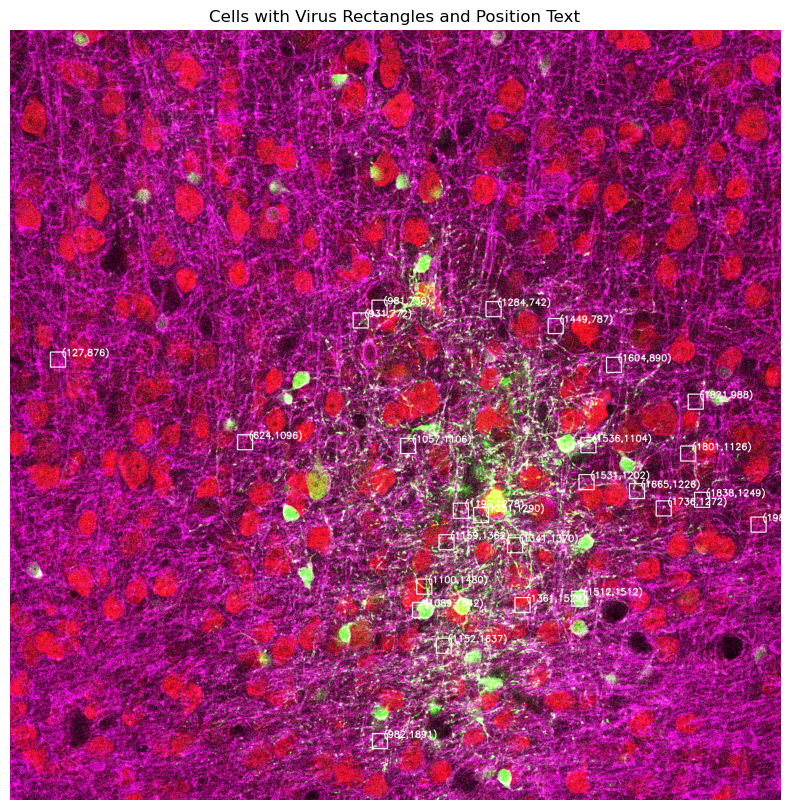

In [24]:
import math
image = cv2.imread(path+'/Image_Oligodendrocytes_virus_neurons.png')
color_virus = (255, 255, 255)  # White for virus
box_size = 20

for position in virus_positions:
    x, y = position
    x = math.floor(x)
    y = math.floor(y)
    
    top_left = (x - box_size, y - box_size)
    bottom_right = (x + box_size, y + box_size)
    cv2.rectangle(image, top_left, bottom_right, color_virus, 2)
    cv2.putText(image, f'({x},{y})', (x + 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color_virus, 2)
    print(f'(x, y) = {(x, y)}, virus_positive')

plt.clf()
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.title("Cells with Virus Rectangles and Position Text")
plt.axis("off")  # Turn off axis for the first subplot
plt.show()

(x, y) = (22, 1289), virus_positive & oligo
(x, y) = (22, 1289), virus_positive & neuron
(x, y) = (99, 1416), virus_positive & neuron
(x, y) = (132, 873), virus_positive & oligo
(x, y) = (132, 873), virus_positive & neuron
(x, y) = (378, 969), virus_positive & oligo
(x, y) = (378, 969), virus_positive & neuron
(x, y) = (404, 1041), virus_positive & oligo
(x, y) = (404, 1041), virus_positive & neuron
(x, y) = (429, 1136), virus_positive & oligo
(x, y) = (429, 1136), virus_positive & neuron
(x, y) = (418, 708), virus_positive & oligo
(x, y) = (418, 708), virus_positive & neuron
(x, y) = (440, 351), virus_positive & oligo
(x, y) = (440, 351), virus_positive & neuron
(x, y) = (539, 1153), virus_positive & oligo
(x, y) = (539, 1153), virus_positive & neuron
(x, y) = (681, 1087), virus_positive & neuron
(x, y) = (778, 1142), virus_positive & oligo
(x, y) = (778, 1142), virus_positive & neuron
(x, y) = (797, 1219), virus_positive & oligo
(x, y) = (797, 1219), virus_positive & neuron
(x, y) = 

<Figure size 640x480 with 0 Axes>

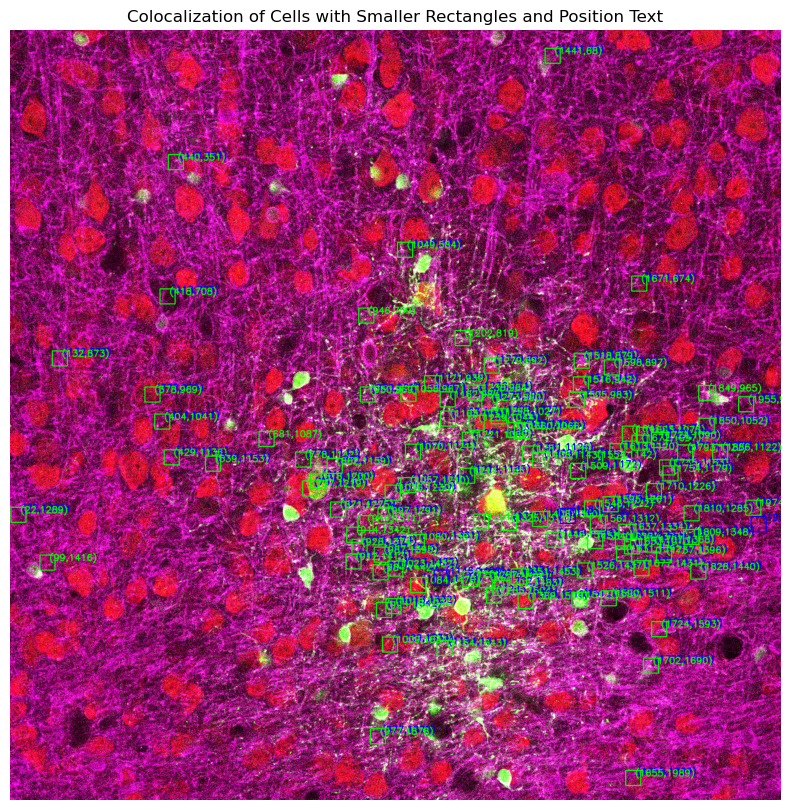

In [16]:
image = cv2.imread(path+'/Image_Oligodendrocytes_virus_neurons.png')
color_virus_oligo = (0, 0, 255)  # Blue for virus-oligo colocalization
color_virus_neuron = (0, 255, 0)  # Green for virus-neuron colocalization
box_size = 20

for position in virus_positions:
    # Check if there is an oligodendrocyte within a small radius (e.g., 1 pixels)
    if oligo_tree.query_ball_point(position, r=1):
        oligo_coloc_count += 1
        x, y = position
        x = math.floor(x)
        y = math.floor(y)
        top_left = (x - box_size, y - box_size)
        bottom_right = (x + box_size, y + box_size)
        cv2.rectangle(image, top_left, bottom_right, color_virus_oligo, 2)
        cv2.putText(image, f'({x},{y})', (x + 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color_virus_oligo, 2)
        print(f'(x, y) = {(x, y)}, virus_positive & oligo')

    # Check if there is a neuron within a small radius (e.g., 5 pixels)
    if neuron_tree.query_ball_point(position, r=1):
        neuron_coloc_count += 1
        x, y = position
        x = math.floor(x)
        y = math.floor(y)
        top_left = (x - box_size, y - box_size)
        bottom_right = (x + box_size, y + box_size)
        cv2.rectangle(image, top_left, bottom_right, color_virus_neuron, 2)
        cv2.putText(image, f'({x},{y})', (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color_virus_neuron, 2)
        print(f'(x, y) = {(x, y)}, virus_positive & neuron')

plt.clf()
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.title("Colocalization of Cells with Smaller Rectangles and Position Text")
plt.axis("off")  # Turn off axis for the first subplot
plt.show()

### Comparison between labels and our results

In [17]:
import pandas as pd

# Load the ground truth data from the uploaded CSV file
ground_truth_path = os.getcwd()+'/counting.csv'
ground_truth_data = pd.read_csv(ground_truth_path)

# Display the first few rows of the data to understand its structure
ground_truth_data.head()

VIRUS_ID    X    Y   OL  NEURON  UNKNOWN
0         1  185   21  1.0     NaN      NaN
1         2  188  453  NaN     NaN      1.0
2         3  356  448  1.0     NaN      NaN
3         4  489  394  NaN     NaN      1.0
4         5  401  772  1.0     NaN      NaN

In [18]:
# Initialize counters
oligo_coloc_count = 0
neuron_coloc_count = 0

for idx, row in ground_truth_data.iterrows():
    x, y = int(row['X']), int(row['Y'])

    # Draw rectangle and add text for oligodendrocyte colocalization
    if row['OL'] == 1.0:
        oligo_coloc_count = oligo_coloc_count+1
        
    # Draw rectangle and add text for neuron colocalization
    elif row['NEURON'] == 1.0:
        neuron_coloc_count = neuron_coloc_count+1

print(f'oligo_coloc_count={oligo_coloc_count}')
print(f'neuron_coloc_count={neuron_coloc_count}')

oligo_coloc_count=34
neuron_coloc_count=2


[OL] (x, y) = (185, 21), virus_positive & oligo
[OL] (x, y) = (356, 448), virus_positive & oligo
[OL] (x, y) = (401, 772), virus_positive & oligo
[OL] (x, y) = (702, 485), virus_positive & oligo
[OL] (x, y) = (708, 416), virus_positive & oligo
[OL] (x, y) = (881, 137), virus_positive & oligo
[OL] (x, y) = (1307, 16), virus_positive & oligo
[OL] (x, y) = (1421, 97), virus_positive & oligo
[OL] (x, y) = (982, 377), virus_positive & oligo
[OL] (x, y) = (1051, 405), virus_positive & oligo
[OL] (x, y) = (1098, 614), virus_positive & oligo
[OL] (x, y) = (1082, 714), virus_positive & oligo
[OL] (x, y) = (1275, 872), virus_positive & oligo
[OL] (x, y) = (1880, 976), virus_positive & oligo
[OL] (x, y) = (1900, 909), virus_positive & oligo
[OL] (x, y) = (1635, 1157), virus_positive & oligo
[OL] (x, y) = (1492, 1104), virus_positive & oligo
[Neuron] (x, y) = (1286, 1252), virus_positive & neuron
[OL] (x, y) = (1542, 1362), virus_positive & oligo
[OL] (x, y) = (1196, 1530), virus_positive & oligo


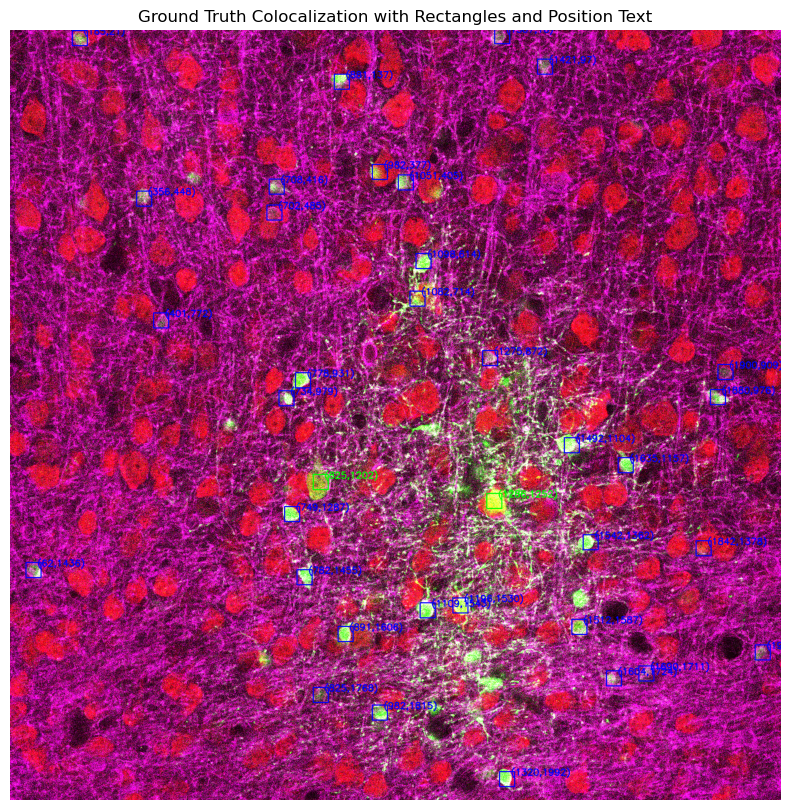

In [ ]:
image = cv2.imread(path+'/Image_Oligodendrocytes_virus_neurons.png')

# Constants
box_size = 20
color_virus_oligo = (0, 0, 255)  # Blue for virus-oligo colocalization
color_virus_neuron = (0, 255, 0)  # Green for virus-neuron colocalization

# Copy image for plotting ground truth separately
image_ground_truth = image.copy()

# Plot ground truth annotations based on the CSV data
for idx, row in ground_truth_data.iterrows():
    y, x = int(row['X']), int(row['Y'])

    # Draw rectangle and add text for oligodendrocyte colocalization
    if row['OL'] == 1.0:
        top_left = (x - box_size, y - box_size)
        bottom_right = (x + box_size, y + box_size)
        cv2.rectangle(image_ground_truth, top_left, bottom_right, color_virus_oligo, 2)
        cv2.putText(image_ground_truth, f'({x},{y})', (x + 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color_virus_oligo, 2)
        print(f'[OL] (x, y) = {(x, y)}, virus_positive & oligo')
        
    # Draw rectangle and add text for neuron colocalization
    if row['NEURON'] == 1.0:
        top_left = (x - box_size, y - box_size)
        bottom_right = (x + box_size, y + box_size)
        cv2.rectangle(image_ground_truth, top_left, bottom_right, color_virus_neuron, 2)
        cv2.putText(image_ground_truth, f'({x},{y})', (x + 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color_virus_neuron, 2)
        print(f'[Neuron] (x, y) = {(x, y)}, virus_positive & neuron')

plt.figure(figsize=(20, 10))
plt.imshow(image_ground_truth)
plt.title("Ground Truth Colocalization with Rectangles and Position Text")
plt.axis("off")  # Turn off axis for the second subplot
plt.show()